In [4]:
using Catalyst
using DifferentialEquations
using BenchmarkTools
using Plots
theme(:dao);

### Delayed Telegraph Model

In [7]:
using Catalyst, DelaySSAToolkit
using Random, Distributions
rn = @reaction_network begin
    kon, Goff --> Gon
    koff, Gon --> Goff
    ρ, Gon --> Gon + N
end
jumpsys = convert(JumpSystem, rn; combinatoric_ratelaws=false)

Model ##ReactionSystem#244
States (3):
  Goff(t)
  Gon(t)
  N(t)
Parameters (3):
  kon
  koff
  ρ

In [85]:
u0 = [1, 0, 0] # Gon, Goff, N
ps = [0.0282,0.609,2.11] # parameters for ρ, r
tf = 200.0
tspan = (0.0, tf)
dprob = DiscreteProblem(u0, tspan,ps)

DiscreteProblem with uType Vector{Int64} and tType Float64. In-place: true
timespan: (0.0, 200.0)
u0: 3-element Vector{Int64}:
 1
 0
 0

In [ ]:
@btime rand(LogNormal(1, sqrt(2)))

  7.132 ns (0 allocations: 0 bytes)


0.805936860798485

In [ ]:
delay_trigger_affect! = function (integrator, rng)
    τ = rand(LogNormal(1, sqrt(2))) + 120
    append!(integrator.de_chan[1], τ)
end
delay_trigger = Dict(3 => delay_trigger_affect!)
delay_complete = Dict(1 => [3 => -1])
delay_interrupt = Dict()
delayjumpset = DelayJumpSet(delay_trigger, delay_complete, delay_interrupt)

DelayJumpSet{var"#35#36", Vector{Pair{Int64, Int64}}, Function}(Dict(3 => var"#35#36"()), Dict(1 => [3 => -1]), Dict{Int64, Function}(), [3], Int64[])

In [87]:
de_chan0 = [[]]
djprob = DelayJumpProblem(jumpsys, dprob, DelayRejection(), delayjumpset, de_chan0, save_positions=(false,false))


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a mass action jump
Number of delay trigger reactions: 1
Number of delay interrupt reactions: 0


In [88]:
ensprob = EnsembleProblem(djprob)
@time ens = solve(ensprob, SSAStepper(), EnsembleThreads(); trajectories=10^5)

  2.229110 seconds (17.92 M allocations: 1.227 GiB, 21.97% gc time, 13.98% compilation time)


EnsembleSolution Solution of length 100000 with uType:
Union{DelaySSAToolkit.DSSASolution{Vector{Vector{Int64}}, Vector{Float64}, Vector{Vector{Vector{Float64}}}}, ODESolution{Int64, 2, Vector{Vector{Int64}}, Nothing, Nothing, Vector{Float64}, Nothing, DiscreteProblem{Vector{Int64}, Tuple{Float64, Float64}, true, Vector{Float64}, DiscreteFunction{true, SciMLBase.FullSpecialize, SciMLBase.var"#234#235", Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}}, SSAStepper, SciMLBase.ConstantInterpolation{Vector{Float64}, Vector{Vector{Int64}}}, SciMLBase.DEStats, Nothing, Nothing, Nothing}}

In [99]:
protein = [ensemble.u[2][3] for ensemble in ens];

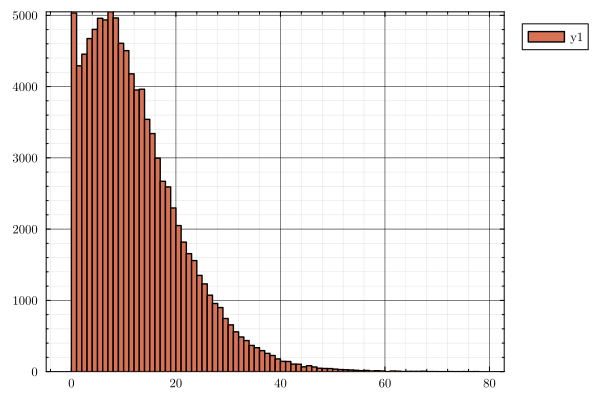

In [100]:
histogram(protein,bins=:scott)

### Michaelis Menten Reaction

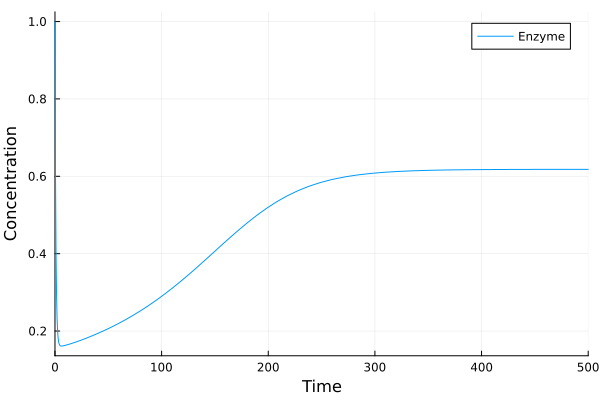

In [ ]:

# Define the reaction network with inhibition
@parameters k1 k2 k3 k4 k5
@variables t
@species S(t) E(t) ES(t) P(t) I(t) EI(t)

rn_inhibition = @reaction_network begin
    (k1, k2), S + E ↔ ES
    k3, ES → E + P
    (k4, k5), I + E ↔ EI
end

# Initial concentrations
u0_inhibition = [S => 10.0, E => 1.0, ES => 0.0, P => 0.0, I => 1.0, EI => 0.0]

# Parameters: k1, k2, k3, k4, k5
p_inhibition = [0.1, 0.1, 0.1, 0.1, 0.1]

# Time span
tspan_inhibition = (0.0, 500.0)

# Solve the differential equations
prob_inhibition = ODEProblem(rn_inhibition, u0_inhibition, tspan_inhibition, p_inhibition)
sol_inhibition = solve(prob_inhibition)

# Plot only enzyme concentration E
plot(sol_inhibition, idxs=[:E], xlabel="Time", ylabel="Concentration", label="Enzyme")

In [8]:
states(jumpsys)

3-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 Goff(t)
 Gon(t)
 N(t)

### JAK-STAT Pathway

#### Gamma Distribution

The Gamma distribution is defined by the following probability density function (PDF):

$ f(x; k, \theta) = \frac{x^{k-1} e^{-x/\theta}}{\theta^k \Gamma(k)} $

where:
- $ x $ is the random variable.
- $ k $ (or $ \alpha $) is the shape parameter.
- $ \theta $ (or $ \beta $) is the scale parameter.
- $ \Gamma(k) $ is the Gamma function.

##### Properties of the Gamma Distribution

- **Mean**: $ \mu = k \theta $
- **Variance**: $ \sigma^2 = k \theta^2 $

In [14]:
k0 = 0.0039; # min⁻¹
k1 = 0.03; # min⁻¹ a.u.⁻¹
k2 = 0.05; # min⁻¹
k3 = 2.32; # min⁻¹
k4 = 31.14; # min⁻¹ a.u.⁻¹
k5 = 0.32; # min⁻¹
k6 = 2.82; # min⁻¹
k7 = 5.49; # min⁻¹
k8 = 4.37; # min⁻¹
k9 = 18.75; # min⁻¹
k10 = 0.0083; # min⁻¹
k11 = 0.24; # min⁻¹
k12 = 0.30; # min⁻¹
k13 = 1.33; # a.u. min⁻¹
k14 = 0.0048; # a.u.⁻¹
k15 = 0.019; # a.u. min⁻¹
k16 = 0.025; # min⁻¹
k17 = 0.022; # min⁻¹

x1_0 = 100; # ng/ml
x3_0 = 0.005; # a.u.
x7_0 = 73.6; # a.u.
x8_0 = 0; # a.u.

τ1 = 39; # min
τ2 = 22; # min
τ3 = 164; # min
τ4 = 185; # min

WB_scale1 = 3.4;
WB_scale2 = 6.6;
PCR_scale1 = 0.0026;

I_tot = 0.0038; # a.u.

p = 4;
q1 = p/τ1;
q2 = p/τ2;
q3 = p/τ3;
q4 = p/τ4;


In [22]:
# Define the reactions with simplified rate constants
rxs = @reaction_network begin
    # Degradation of IFNg
    k0, IFNg --> 0
    # Binding of IFNg to Ir to form IIr
    k1, IFNg + Ir --> IIr
    # Dissociation of IIr to form IFNg and Ir
    k2, IIr --> IFNg + Ir
    # Production of STAT1_int from IIr
    k3, IIr --> IIr + STAT1_int

    # Translocation of STAT1Dn to STAT1Un
    k5, STAT1Dn --> STAT1Un
    # Translocation of STAT1Dc to STAT1Dn
    k6, STAT1Dc --> STAT1Dn
    # Binding of STAT1Dn to form STAT1Db
    k7, STAT1Dn --> STAT1Db
    # Degradation of STAT1Db
    k8, STAT1Db --> 0
    # STAT1Db delay triggers SOCS1 production
    k9, STAT1Db --> STAT1Db + SOCS1_int

    # Creation of SOCS1
    k13, 0 --> SOCS1
    # Degradation of SOCS1
    k10, SOCS1 --> 0

    # Translocation of STAT1UC to STAT1Un
    k11, STAT1UC --> STAT1Un
    # Degradation of STAT1Un
    k12, STAT1Un --> 0

    # STAT1Db delay triggers IRF1 production
    k15, STAT1Db --> STAT1DBb + IRF1_int
    # Creation of IRF1
    k16, 0 --> IRF1
    # Degradation of IRF1
    k17, IRF1 --> 0

    # Michaelis-Menten reaction with inhibition: Binding of IIr and STAT1Uc to form IIr_STAT1Uc
    ke1, IIr + STAT1Uc --> IIr_STAT1Uc
    # Dissociation of IIr_STAT1Uc to form IIr and STAT1Dc
    ke2, IIr_STAT1Uc --> IIr + STAT1Dc

    # Inhibition reaction: Binding of SOCS1 and IIr to form SOCS1_IIr
    ki1, SOCS1 + IIr --> SOCS1_IIr
    # Dissociation of SOCS1_IIr to form SOCS1 and IIr
    ki2, SOCS1_IIr --> SOCS1 + IIr
end

# Convert to JumpSystem
jumpsys_jakstat = convert(JumpSystem, rxs; combinatoric_ratelaws=false)

Model ##ReactionSystem#286
States (17):
  IFNg(t)
  Ir(t)
  IIr(t)
  STAT1_int(t)
  STAT1Dn(t)
  STAT1Un(t)
⋮
Parameters (20):
  k0
  k1
  k2
  k3
  k5
  k6
⋮

In [21]:
states(jumpsys_jakstat)

13-element Vector{SymbolicUtils.BasicSymbolic{Real}}:
 IFNg(t)
 Ir(t)
 IIr(t)
 STAT1UC(t)
 STAT1Un(t)
 STAT1Dc(t)
 STAT1Dn(t)
 STAT1Db(t)
 SOCS1(t)
 IRF1(t)
 STAT1Uc(t)
 IIr_STAT1Uc(t)
 SOCS1_IIr(t)

In [ ]:
# STAT1Db delay triggers SOCS1 production
delay_trigger_affect! = function (integrator, rng)
    τ = rand(Gamma(p, q1))
    append!(integrator.de_chan[1], τ)
end
delay_trigger = Dict(9 => delay_trigger_affect!)
delay_complete = Dict(1 => [9 => -1])
delay_interrupt = Dict()
delayjumpset = DelayJumpSet(delay_trigger, delay_complete, delay_interrupt)